In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [91]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [92]:
train.reindex(np.random.permutation(train.index))
test.reindex(np.random.permutation(test.index))

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
43416,test_43416,10.1957,7.4476,6.0769,6.9987,13.0524,0.3298,5.6517,14.4607,2.1340,...,6.9380,4.5350,4.4042,-0.4062,21.8946,-0.5289,-3.4766,10.0839,10.7445,-0.5280
90410,test_90410,3.9226,-0.2328,12.9901,6.8533,10.8751,3.0468,6.0986,13.9441,-1.7909,...,2.9242,10.7192,0.8785,2.6776,21.9440,1.0144,2.5153,10.5457,14.8921,-11.7628
17548,test_17548,12.8153,-1.4921,6.8900,3.2109,9.1664,4.9952,6.7735,12.4147,-3.0746,...,4.7421,4.6256,0.4574,5.9743,15.1212,3.1886,-1.4013,8.2422,11.9464,-18.9563
111649,test_111649,11.2905,-5.0701,12.4884,2.1864,11.2080,-1.0153,5.5527,9.9832,-2.1383,...,3.8584,5.3451,1.6541,9.1670,15.5866,0.1994,5.9142,8.8332,12.7941,-10.3084
61342,test_61342,7.9290,-8.0267,11.0078,8.3218,9.4835,-11.6267,7.1009,9.7882,2.8526,...,-1.5750,5.0592,1.0347,-1.3563,14.5966,1.5634,4.0359,8.5657,17.0937,10.3893
160119,test_160119,11.5649,2.0512,13.5113,7.8140,12.8281,-10.2395,3.9467,18.2354,1.3895,...,-4.2183,11.3687,1.7765,-1.5367,16.6002,-2.5489,2.2359,10.6495,14.1677,-5.5631
84506,test_84506,9.8105,-9.3098,8.4032,3.4557,12.5242,-7.6653,4.8603,20.7475,-2.5276,...,-8.4794,9.1551,4.2980,1.6091,18.4297,1.7186,-5.3763,7.1217,18.1773,-2.9116
102502,test_102502,13.0308,-0.3877,11.3041,8.1591,12.4488,-2.9956,4.1920,18.1597,2.1693,...,5.1756,8.7834,2.8243,3.3818,16.3618,-1.3806,-1.1811,10.8977,17.9015,-6.3453
134526,test_134526,8.7709,0.9044,12.1038,3.1784,13.1483,-2.4476,6.7780,14.2927,2.8051,...,-7.0094,7.4451,3.3361,0.0580,20.8801,-3.2335,5.9739,8.5494,14.5243,-21.2790
143042,test_143042,11.6084,-1.7960,8.1233,4.1620,9.4906,-12.4395,5.7855,17.5931,1.6251,...,4.0477,8.8617,4.0493,2.4256,20.1986,-2.4807,1.8010,8.3933,17.6408,-0.1230


In [95]:
#creating matrices for sklearn:
X_train = train.drop('target', 1).drop('ID_code', 1)
X_test = test.drop('ID_code', 1)
y = train.target

In [96]:
import xgboost as xgb

In [82]:
dtrain = xgb.DMatrix(X_train.head(1000), label=y.head(1000))
dtest = xgb.DMatrix(X_test.head(1000))

params = {"max_depth":4, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

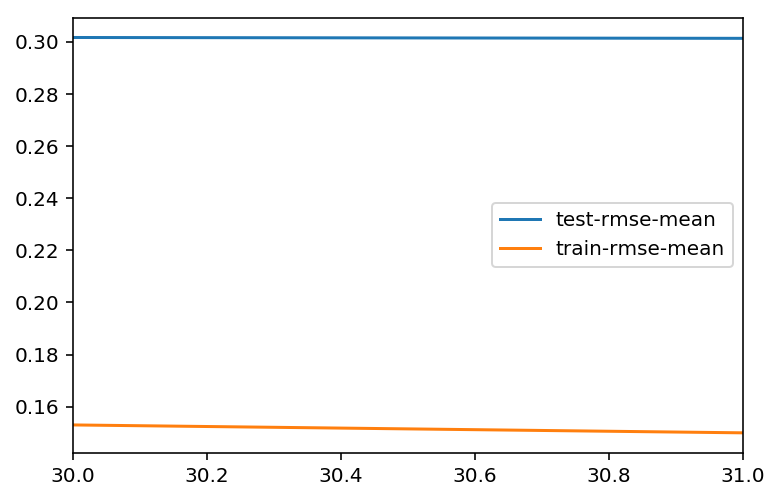

In [83]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [106]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=4, learning_rate=0.1) #the params were tuned using xgb.cv

In [107]:
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=360, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [108]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
# lasso_preds = np.expm1(model_lasso.predict(X_test))
# ridge_preds = np.expm1(model_ridge.predict(X_test))

In [109]:
preds = xgb_preds

In [110]:
solution = pd.DataFrame({"ID_code":test.ID_code, "target":preds})
solution.to_csv("sub.csv", index = False)